<a href="https://colab.research.google.com/github/tianiachan/Data640DeepLearning/blob/main/Tiania__Model_Fashion_MNIST_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries for ML models
import numpy as np
import pandas as pd
import os
import tarfile
import tensorflow.keras 
from tensorflow.keras.datasets import fashion_mnist #the dataset

<p>Now lets load up the data.</p>

In [2]:
#function to visualize the image in the file
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [3]:
#import the data in from fashion mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)

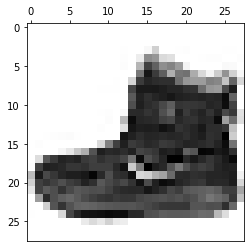

In [4]:
#show first image in training data
show(train_x[0])

In [5]:
#get the shape of the image which is 60000 instances of 28x28 pixel sized images
train_x.shape

(60000, 28, 28)

<p>Now that we've imported the data, we'll need to start importing what we need from Keras to build our network. Below is a basic network. Note that the images are greyscale, so there is no color channel like there is in some of the other datasets.</p>

<p>Also, since there's no color channel, we'll use "1D" layers not "2D" layers as are used when we have channels for colors.</p>

In [6]:
#additional libraries to add to top after understanding this model better
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense

<p>Now it's time for us to start building the network. Build below is a sample network you can play with as a starting point for your assignment. Feel free to expand on this, or start your own from scratch!</p>

In [7]:
#create the sequential model
model = Sequential()
#first layer
#convolutional layer
model.add(Conv1D(filters = 236, kernel_size = 2,  input_shape = (28, 28)))
#add pooling aka sample size
model.add(MaxPooling1D(pool_size = 2))
# add drop out % for model training
model.add(Dropout(0.2))
#normalize values across matrix
model.add(BatchNormalization())
#second layer
model.add(Conv1D(filters = 128, kernel_size = 2))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#flatten out the layers
model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

In [8]:
#model2 - activation relu
model2 = Sequential()

#first layer
model2.add(Conv1D(filters = 236, kernel_size = 2, input_shape = (28,28), activation = 'relu'))
model2.add(MaxPooling1D(pool_size = 3))
model2.add(Dropout(.3))
model2.add(BatchNormalization())

#second layer
model2.add(Conv1D(filters = 128, kernel_size = 2, input_shape = (28,28), activation = 'relu'))
model2.add(MaxPooling1D(pool_size = 3))
model2.add(Dropout(.3))
model2.add(BatchNormalization())

#flatten the layers
model2.add(Flatten())
model2.add(Dense(units=10, activation = 'softmax'))

In [9]:
#model 3 - three layers
model3 = Sequential()

#first layer
model3.add(Conv1D(filters = 238, kernel_size = 2, input_shape = (28,28)))
model3.add(MaxPooling1D(pool_size = 2))
model3.add(Dropout(.2))
model3.add(BatchNormalization())

#second layer
model3.add(Conv1D(filters = 128, kernel_size = 2, input_shape = (28,28)))
model3.add(MaxPooling1D(pool_size = 2))
model3.add(Dropout(.2))
model3.add(BatchNormalization())

#third layer
model3.add(Conv1D(filters = 64, kernel_size = 2, input_shape = (28,28)))
model3.add(MaxPooling1D(pool_size = 2))
model3.add(Dropout(.2))
model3.add(BatchNormalization())

#flatten the layers
model3.add(Flatten())
model3.add(Dense(units=10, activation = 'softmax'))

In [10]:
#compile the model together with all the layers defining the loss, optimizer method and metric to judge model on
model.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

# compile model2
model2.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

#compile model3
model3.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

In [11]:
# # compile model2
# model2.compile(loss = 'categorical_crossentropy', 
#               optimizer = tensorflow.keras.optimizers.Adadelta(), 
#               metrics = ['accuracy'])

In [12]:
# #compile model3
# model3.compile(loss = 'categorical_crossentropy', 
#               optimizer = tensorflow.keras.optimizers.Adadelta(), 
#               metrics = ['accuracy'])

In [13]:
# run the model on test and training data, determine number of epoch/iterations, batch size aka how many samples before next iteration
model.fit(train_x, train_y, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 23s 47ms/step - loss: 2.8002 - accuracy: 0.1384
Epoch 2/10
469/469 [==============================] - 22s 48ms/step - loss: 2.2268 - accuracy: 0.2639
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 1.8597 - accuracy: 0.3649
Epoch 4/10
469/469 [==============================] - 21s 46ms/step - loss: 1.6084 - accuracy: 0.4428
Epoch 5/10
469/469 [==============================] - 23s 49ms/step - loss: 1.4434 - accuracy: 0.4951
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 1.3294 - accuracy: 0.5342
Epoch 7/10
469/469 [==============================] - 22s 46ms/step - loss: 1.2415 - accuracy: 0.5634
Epoch 8/10
469/469 [==============================] - 22s 48ms/step - loss: 1.1714 - accuracy: 0.5885
Epoch 9/10
469/469 [==============================] - 22s 47ms/step - loss: 1.1192 - accuracy: 0.6073
Epoch 10/10
469/469 [==============================] - 22s 47ms/step - loss: 1.068

In [14]:
#print out the loss and accuracy of the model
score1 = model.evaluate(test_x, test_y)
print('\nloss is: ' + str(score1[0]))
print('accuracy is: ' + str(score1[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.8993 - accuracy: 0.6922

loss is: 0.8993300795555115
accuracy is: 0.6922000050544739


In [15]:
model2.fit(train_x, train_y, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 19s 38ms/step - loss: 2.9989 - accuracy: 0.1147
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 2.6757 - accuracy: 0.1647
Epoch 3/10
469/469 [==============================] - 18s 38ms/step - loss: 2.4178 - accuracy: 0.2145
Epoch 4/10
469/469 [==============================] - 19s 40ms/step - loss: 2.2113 - accuracy: 0.2699
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 2.0325 - accuracy: 0.3193
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 1.9034 - accuracy: 0.3586
Epoch 7/10
469/469 [==============================] - 18s 38ms/step - loss: 1.7877 - accuracy: 0.3949
Epoch 8/10
469/469 [==============================] - 18s 38ms/step - loss: 1.6982 - accuracy: 0.4199
Epoch 9/10
469/469 [==============================] - 18s 39ms/step - loss: 1.6100 - accuracy: 0.4483
Epoch 10/10
469/469 [==============================] - 18s 38ms/step - loss: 1.544

In [16]:
#print out the loss and accuracy of the model
score2 = model2.evaluate(test_x, test_y)
print('\nloss is: ' + str(score2[0]))
print('accuracy is: ' + str(score2[1]))

313/313 [==============================] - 2s 4ms/step - loss: 1.2750 - accuracy: 0.5979

loss is: 1.2749849557876587
accuracy is: 0.5978999733924866


In [17]:
#try with more epochs
model2.fit(train_x, train_y, epochs = 15, batch_size = 128)

Epoch 1/15
469/469 [==============================] - 18s 38ms/step - loss: 1.4775 - accuracy: 0.4927
Epoch 2/15
469/469 [==============================] - 17s 37ms/step - loss: 1.4260 - accuracy: 0.5082
Epoch 3/15
469/469 [==============================] - 18s 38ms/step - loss: 1.3788 - accuracy: 0.5247
Epoch 4/15
469/469 [==============================] - 19s 40ms/step - loss: 1.3364 - accuracy: 0.5380
Epoch 5/15
469/469 [==============================] - 18s 38ms/step - loss: 1.3012 - accuracy: 0.5496
Epoch 6/15
469/469 [==============================] - 18s 38ms/step - loss: 1.2616 - accuracy: 0.5641
Epoch 7/15
469/469 [==============================] - 18s 38ms/step - loss: 1.2352 - accuracy: 0.5731
Epoch 8/15
469/469 [==============================] - 17s 37ms/step - loss: 1.2023 - accuracy: 0.5827
Epoch 9/15
469/469 [==============================] - 17s 37ms/step - loss: 1.1798 - accuracy: 0.5917
Epoch 10/15
469/469 [==============================] - 17s 36ms/step - loss: 1.157

In [18]:
#try with more epochs
score5 = model2.evaluate(test_x, test_y)
print('\nloss is: ' + str(score5[0]))
print('accuracy is: ' + str(score5[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.8934 - accuracy: 0.6870

loss is: 0.8934330940246582
accuracy is: 0.6869999766349792


In [19]:
model3.fit(train_x, train_y, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 27s 54ms/step - loss: 2.6033 - accuracy: 0.1748
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 2.1418 - accuracy: 0.2738
Epoch 3/10
469/469 [==============================] - 25s 53ms/step - loss: 1.8523 - accuracy: 0.3515
Epoch 4/10
469/469 [==============================] - 26s 55ms/step - loss: 1.6534 - accuracy: 0.4158
Epoch 5/10
469/469 [==============================] - 25s 52ms/step - loss: 1.5239 - accuracy: 0.4587
Epoch 6/10
469/469 [==============================] - 25s 53ms/step - loss: 1.4270 - accuracy: 0.4902
Epoch 7/10
469/469 [==============================] - 25s 54ms/step - loss: 1.3518 - accuracy: 0.5181
Epoch 8/10
469/469 [==============================] - 25s 54ms/step - loss: 1.2835 - accuracy: 0.5456
Epoch 9/10
469/469 [==============================] - 27s 57ms/step - loss: 1.2419 - accuracy: 0.5629
Epoch 10/10
469/469 [==============================] - 25s 54ms/step - loss: 1.201

In [20]:
#print out the loss and accuracy of the model
score3 = model3.evaluate(test_x, test_y)
print('\nloss is: ' + str(score3[0]))
print('accuracy is: ' + str(score3[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.9705 - accuracy: 0.6882

loss is: 0.9705042243003845
accuracy is: 0.6881999969482422


In [21]:
#try again with more epochs
model3.fit(train_x, train_y, epochs = 15, batch_size = 128)

Epoch 1/15
469/469 [==============================] - 25s 53ms/step - loss: 1.1650 - accuracy: 0.5915
Epoch 2/15
469/469 [==============================] - 26s 55ms/step - loss: 1.1315 - accuracy: 0.6037
Epoch 3/15
469/469 [==============================] - 26s 55ms/step - loss: 1.1086 - accuracy: 0.6133
Epoch 4/15
469/469 [==============================] - 24s 51ms/step - loss: 1.0852 - accuracy: 0.6214
Epoch 5/15
469/469 [==============================] - 25s 53ms/step - loss: 1.0649 - accuracy: 0.6303
Epoch 6/15
469/469 [==============================] - 24s 52ms/step - loss: 1.0450 - accuracy: 0.6373
Epoch 7/15
469/469 [==============================] - 25s 53ms/step - loss: 1.0276 - accuracy: 0.6417
Epoch 8/15
469/469 [==============================] - 26s 56ms/step - loss: 1.0088 - accuracy: 0.6492
Epoch 9/15
469/469 [==============================] - 25s 53ms/step - loss: 0.9969 - accuracy: 0.6538
Epoch 10/15
469/469 [==============================] - 25s 53ms/step - loss: 0.982

In [22]:
#print out the loss and accuracy of the model
score6 = model3.evaluate(test_x, test_y)
print('\nloss is: ' + str(score6[0]))
print('accuracy is: ' + str(score6[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.7808 - accuracy: 0.7392

loss is: 0.7808361053466797
accuracy is: 0.7391999959945679


In [23]:
#try model 1 but with more epochs
model.fit(train_x, train_y, epochs = 15, batch_size = 128)

Epoch 1/15
469/469 [==============================] - 22s 46ms/step - loss: 1.0345 - accuracy: 0.6387
Epoch 2/15
469/469 [==============================] - 23s 48ms/step - loss: 1.0076 - accuracy: 0.6504
Epoch 3/15
469/469 [==============================] - 22s 47ms/step - loss: 0.9769 - accuracy: 0.6603
Epoch 4/15
469/469 [==============================] - 22s 47ms/step - loss: 0.9510 - accuracy: 0.6685
Epoch 5/15
469/469 [==============================] - 22s 46ms/step - loss: 0.9324 - accuracy: 0.6770
Epoch 6/15
469/469 [==============================] - 22s 47ms/step - loss: 0.9090 - accuracy: 0.6867
Epoch 7/15
469/469 [==============================] - 23s 48ms/step - loss: 0.8932 - accuracy: 0.6902
Epoch 8/15
469/469 [==============================] - 23s 50ms/step - loss: 0.8796 - accuracy: 0.6953
Epoch 9/15
469/469 [==============================] - 21s 45ms/step - loss: 0.8615 - accuracy: 0.7013
Epoch 10/15
469/469 [==============================] - 21s 45ms/step - loss: 0.852

In [24]:
#print out the loss and accuracy of the model
score4 = model.evaluate(test_x, test_y)
print('\nloss is: ' + str(score4[0]))
print('accuracy is: ' + str(score4[1]))

313/313 [==============================] - 1s 5ms/step - loss: 0.6971 - accuracy: 0.7591

loss is: 0.6970868706703186
accuracy is: 0.7591000199317932


In [31]:
print("Model 1 @ 10 epochs:") 
print("Loss: ",score1[0],"Accuracy: ",score1[0])
print("Model 2 @ 10 epochs:") 
print("Loss: ",score2[0],"Accuracy: ",score2[0])
print("Model 3 @ 10 epochs:") 
print("Loss: ",score3[0],"Accuracy: ",score3[0])
print("Model 1 @ 15 epochs:") 
print("Loss: ",score4[0],"Accuracy: ",score4[0])
print("Model 2 @ 15 epochs:") 
print("Loss: ",score5[0],"Accuracy: ",score5[0])
print("Model 3 @ 15 epochs:") 
print("Loss: ",score6[0],"Accuracy: ",score6[0])

Model 1 @ 10 epochs:
Loss:  0.8993300795555115 Accuracy:  0.8993300795555115
Model 2 @ 10 epochs:
Loss:  1.2749849557876587 Accuracy:  1.2749849557876587
Model 3 @ 10 epochs:
Loss:  0.9705042243003845 Accuracy:  0.9705042243003845
Model 1 @ 15 epochs:
Loss:  0.6970868706703186 Accuracy:  0.6970868706703186
Model 2 @ 15 epochs:
Loss:  0.8934330940246582 Accuracy:  0.8934330940246582
Model 3 @ 15 epochs:
Loss:  0.7808361053466797 Accuracy:  0.7808361053466797


In [32]:
#display results as a dataframe?
Models

In [33]:
df

""
